# Challenge Set 6 - Alison Glazer
Topic: Challenge Set 6 Subject: Explore MTA turnstile data Date: 10/13/2019 Name: Alison Glazer Worked with: -- Location: https://github.com/alisonglazer/metis_challenges/blob/master/challenge_set_6_alison.ipynb

In [1]:
import sys
print("Python Version:", sys.version)

Python Version: 3.6.9 |Anaconda, Inc.| (default, Jul 30 2019, 13:42:17) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


In [8]:
# Import libraries
import pandas as pd
import numpy as np

import statsmodels.api as sm
import patsy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import train_test_split

## **CHALLENGE 1**

In [5]:
# Generate random data linearly related to log(x)

# We start by seeding the random number generator so that everyone will have the same "random" results
np.random.seed(9)

# Function that returns the sin(2*pi*x)
def f(x):
    return np.log(x)

# Generate points and keep a subset of them
n_samples = 1000
# Generate the x values from the random uniform distribution between 0 and 1
X = np.random.uniform(0, 1, size=n_samples)[:, np.newaxis]

# Generate the y values by taking the log and adding a random Gaussian (normal) noise term
y = f(X) + np.random.normal(scale=0.3, size=n_samples)[:, np.newaxis]

In [48]:
# First fit a quadratic model

# Generate the model type with make_pipeline
lm_poly = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

lm_poly.fit(X, y); # Fit our model to the training data

y_pred_poly = lm_poly.predict(X)

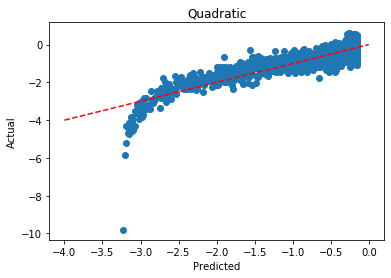

In [24]:
plt.scatter(y_pred_poly,y)
plt.plot([-4, 0],[-4, 0],'r--')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Quadratic');

In [20]:
# Next fit a log model
# Do a log transform on the feature

X_log = np.log(X)

# Generate the model
lm_log = LinearRegression()

lm_log.fit(X_log, y); # Fit our model to the training data

y_pred_log = lm_log.predict(X_log)

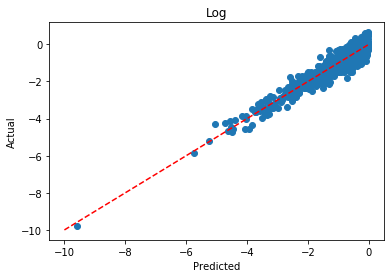

In [23]:
plt.scatter(y_pred_log,y)
plt.plot([-10, 0],[-10, 0],'r--')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Log');

## **CHALLENGE 2**

In [25]:
# Generate random data

# We start by seeding the random number generator so that everyone will have the same "random" results
np.random.seed(9)

# Function that returns the sin(2*pi*x)
def g(x):
    return 3 + 2*x + 4*x**2 # B0 = 3, B1 = 2, B2 = 4

# Generate points and keep a subset of them
n_samples = 1000
# Generate the x values from the random uniform distribution between 0 and 1
X = np.random.uniform(0, 1, size=n_samples)[:, np.newaxis]

# Generate the y values by taking the log and adding a random Gaussian (normal) noise term
y = g(X) + np.random.normal(scale=0.3, size=n_samples)[:, np.newaxis]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [33]:
lm = LinearRegression()
lm.fit(X_train,y_train)
y_pred_train = lm.predict(X_train)
print('MSE on training data = {:f}'.format(mean_squared_error(y_train, y_pred_train)))

y_pred_test = lm.predict(X_test)
print('MSE on test data = {:f}'.format(mean_squared_error(y_test, y_pred_test)))


MSE on training data = 0.194994
MSE on test data = 0.181974


## **CHALLENGE 3**

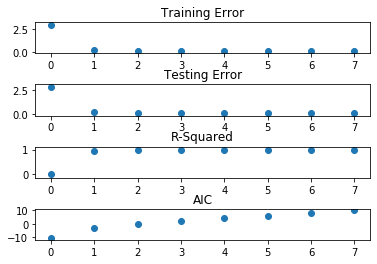

In [66]:
degrees = np.arange(0,8,1)

training_error = []
test_error = []
r2 = []
aic = []

for deg in degrees:
    lm_poly = make_pipeline(PolynomialFeatures(degree=deg), LinearRegression())
    lm_poly.fit(X_train,y_train);
    
    y_pred_train = lm_poly.predict(X_train)
    training_error.append(mean_squared_error(y_train, y_pred_train))
    
    y_pred_test = lm_poly.predict(X_test)
    test_error.append(mean_squared_error(y_test, y_pred_test))
    
    r2.append(r2_score(y_test,y_pred_test))
    
    resid = y_test - y_pred_test
    sse = sum(resid**2)
    k = lm_poly.named_steps['linearregression'].coef_.shape[1]
    aic_val = 2*k - 2*np.log(sse)
    aic.append(aic_val)

plt.subplots(4,1,sharex=True)
plt.subplots_adjust(hspace=1)
plt.subplot(4,1,1)
plt.scatter(degrees,training_error)
plt.title('Training Error')

plt.subplot(4,1,2)
plt.scatter(degrees,test_error)
plt.title('Testing Error')

plt.subplot(4,1,3)
plt.scatter(degrees,r2)
plt.title('R-Squared')

plt.subplot(4,1,4)
plt.scatter(degrees,aic)
plt.title('AIC');


## **CHALLENGE 4**

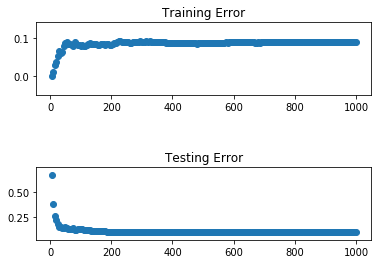

In [68]:
X_small = X[0:5]
y_small = y[0:5]

chunks = np.arange(5,n_samples+5,5)

training_error = []
test_error = []

for chunk in chunks:
    lm_poly = make_pipeline(PolynomialFeatures(degree=deg), LinearRegression())
    lm_poly.fit(X_train[0:chunk],y_train[0:chunk])
    
    y_pred_train = lm_poly.predict(X_train[0:chunk])
    training_error.append(mean_squared_error(y_train[0:chunk], y_pred_train[0:chunk]))
    
    y_pred_test = lm_poly.predict(X_test[0:chunk])
    test_error.append(mean_squared_error(y_test[0:chunk], y_pred_test[0:chunk]))



# Plot learning curve

plt.subplots(2,1,sharex=True)
plt.subplots_adjust(hspace=1)
plt.subplot(2,1,1)
plt.scatter(chunks,training_error)
plt.title('Training Error')

plt.subplot(2,1,2)
plt.scatter(chunks,test_error)
plt.title('Testing Error');
